# Data Analysis of the Turn Around Times

## Loading Libraries

In [35]:
import numpy as np
import LoadData as ld
import CreatingVariableBins as cvb
import Models as mod

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default')

from lmfit import Model
import scipy.optimize
#_____________________________________________
plt.close("all")

## Loading Data

In [36]:
data1, data2, data3 = ld.Create_DataSet()
data_16, data_17, data_18 = ld.DataToLists(data1, data2, data3)
array16, array17, array18 = ld.FromListsToArrays(data_16, data_17, data_18)
data_tot, dataTot, array_tot = ld.TotalDataSet(data_16, data_17, data_18)
data_tot_A, data_tot_B, data_tot_C, array_totA, array_totB, array_totC = ld.PartialDataSets(data_16, data_17, data_18)
bi16, bi17, bi18, biT, biTA, biTB, biTC = cvb.CreateBins(array16, array17, array18, array_tot, array_totA, array_totB, array_totC)

## Fitting Models

In [47]:
NEl_mod = mod.N_ExpLaw_Model() 
NTpl_mod = mod.N_TruncLaw_Model()

## 2016

In [48]:
A = np.min(array16)
B = np.max(array16)
def HighNormalized_PowerLaw (x, Off, n):
        return ((1-n)/(((B-Off)**(1-n))-(A-Off)**(n-1)))*(1/((x-Off)**n))
HnPl_mod = Model(HighNormalized_PowerLaw) 

In [49]:
print(A, B)

2.480277777777778 22.814166666666665


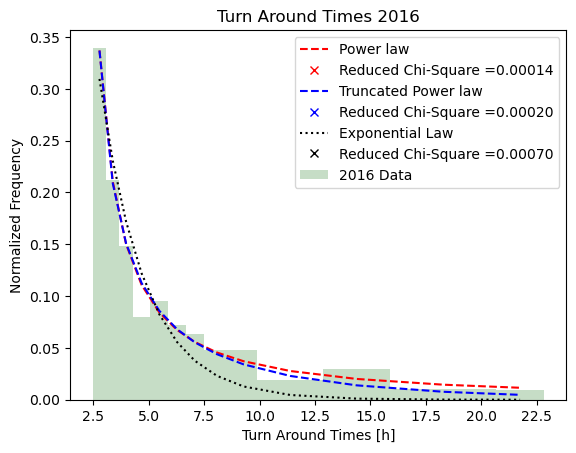

In [50]:
fig1, ax1 = plt.subplots()
n1, bins1, patches1 = ax1.hist(data_16, bins=bi16, facecolor='darkseagreen', alpha=0.5, density=True, label="2016 Data")

binscenters = np.array([0.5 * (bins1[i] + bins1[i+1]) for i in range(len(bins1)-1)])
x = binscenters
y = n1

hnpl_result = HnPl_mod.fit(y, x=x, Off=1.8, n=0.5) 
ax1.plot(binscenters, hnpl_result.best_fit, 'r--', label="Power law")
ax1.plot([], [], 'rx ', label='Reduced Chi-Square ={:.5f}'.format(hnpl_result.redchi))
#ax1.plot([], [], 'rx', label='Offset = {:.3f} +/- {:.3f}'.format(hnpl_result.params['Off'].value, hnpl_result.params['Off'].stderr ))
#ax1.plot([], [], 'rx', label='Exponent = {:.3f} +/- {:.3f}'.format(hnpl_result.params['n'].value, hnpl_result.params['n'].stderr ))

NTpl_mod.set_param_hint('off', value=1.7, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.7, amp=1, lam=0.2, n=0.9) 
ax1.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax1.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
#ax1.plot([], [], 'bx', label='Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['off'].value, ntpl_result.params['off'].stderr ))
#ax1.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['n'].value, ntpl_result.params['n'].stderr ))
#ax1.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
#ax1.plot([], [], 'bx', label='\u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['lam'].value, ntpl_result.params['lam'].stderr ))



nel_result = NEl_mod.fit(y, x=x, off=2, lam=0) 
ax1.plot(binscenters, nel_result.best_fit, 'k:', label="Exponential Law")
ax1.plot([], [], 'kx ', label='Reduced Chi-Square ={:.5f}'.format(nel_result.redchi))
#ax1.plot([], [], 'kx', label='\u03BB = {:.3f} +/- {:.3f}'.format(nel_result.params['lam'].value, nel_result.params['lam'].stderr ))
#ax1.plot([], [], 'kx', label='Offset = {:.3f} +/- {:.3f}'.format(nel_result.params['off'].value, nel_result.params['off'].stderr ))

plt.title('Turn Around Times 2016')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig1.savefig("Turn Around Times 2016.pdf")

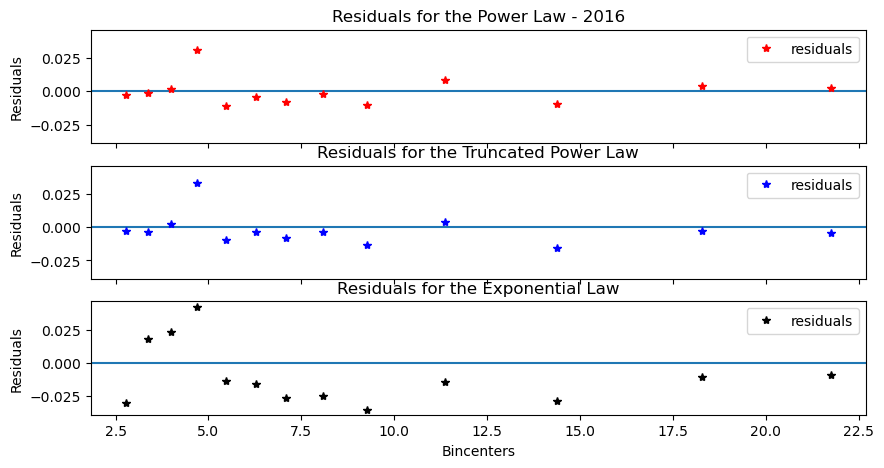

In [51]:
plt.close("all")
fig2, (ax2A, ax2B, ax2C) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10, 5))
hnpl_result.plot_residuals(ax2A, datafmt='r*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax2A.set_ylabel("Residuals")
ax2A.set_title("Residuals for the Power Law - 2016")
ntpl_result.plot_residuals(ax2B, datafmt='b*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax2B.set_ylabel("Residuals")
ax2B.set_title("Residuals for the Truncated Power Law")
nel_result.plot_residuals(ax2C, datafmt='k*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
plt.xlabel("Bincenters")
ax2C.set_ylabel("Residuals")
ax2C.set_title("Residuals for the Exponential Law")
plt.show()
fig2.savefig("Residuals - 2016.pdf")

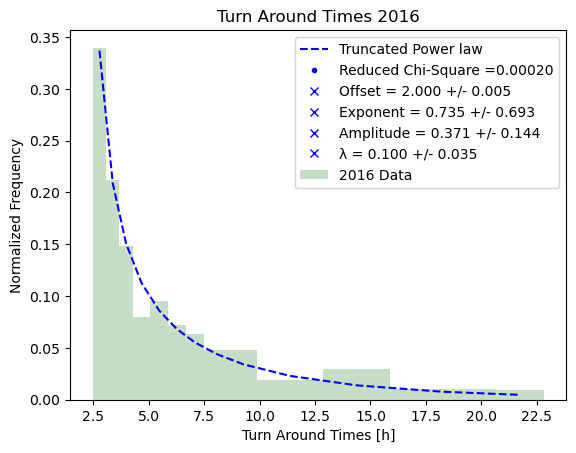

In [52]:
plt.close("all")
fig1, ax1 = plt.subplots()
n1, bins1, patches1 = ax1.hist(data_16, bins=bi16, facecolor='darkseagreen', alpha=0.5, density=True, label="2016 Data")

binscenters = np.array([0.5 * (bins1[i] + bins1[i+1]) for i in range(len(bins1)-1)])
x = binscenters
y = n1

NTpl_mod.set_param_hint('off', value=1.7, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.7, amp=1, lam=0.2, n=0.9) 
ax1.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax1.plot([], [], 'b. ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax1.plot([], [], 'bx', label='Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['off'].value, ntpl_result.params['off'].stderr ))
ax1.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['n'].value, ntpl_result.params['n'].stderr ))
ax1.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax1.plot([], [], 'bx', label='\u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['lam'].value, ntpl_result.params['lam'].stderr ))


plt.title('Turn Around Times 2016')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig1.savefig("Turn Around Times 2016 Fit.pdf")

In [53]:
print('____________________2016_______________________________')
print('RESULTs OF THE POWER LAW FIT')
print('-------------------------------------------------------')
print(hnpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE TRUNCATED POWER LAW FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE EXPONENTIAL FIT')
print('-------------------------------------------------------')
print(nel_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')

____________________2016_______________________________
RESULTs OF THE POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(HighNormalized_PowerLaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 13
    # variables        = 2
    chi-square         = 0.00150149
    reduced chi-square = 1.3650e-04
    Akaike info crit   = -113.861243
    Bayesian info crit = -112.731345
[[Variables]]
    Off:  1.50281174 +/- 0.06305481 (4.20%) (init = 1.8)
    n:    1.22130313 +/- 0.08565975 (7.01%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(Off, n) = -0.946
_______________________________________________________
_______________________________________________________
_______________________________________________________
RESULTs OF THE TRUNCATED POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(Normalized_TruncatedPowerLaw)
[[Fit Statisti

### Removing correlation

In [24]:
def TPL_corr(x, uoff, ulam, un, amp):
     return (amp/(x-(-0.957*amp+uoff))**((amp-un)/0.887))*(np.exp(-(-(amp-ulam)/0.692)*(x)))

Corr_mod = Model(TPL_corr)

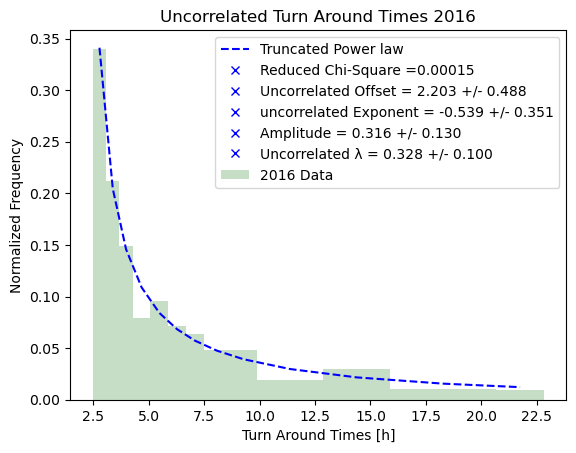

In [32]:
plt.close("all")
fig1, ax1 = plt.subplots()
n1, bins1, patches1 = ax1.hist(data_16, bins=bi16, facecolor='darkseagreen', alpha=0.5, density=True, label="2016 Data")

binscenters = np.array([0.5 * (bins1[i] + bins1[i+1]) for i in range(len(bins1)-1)])
x = binscenters
y = n1

#Corr_mod.set_param_hint('n', value=0.5, min=0, max=2.0)
#Corr_mod.set_param_hint('uamp', value=0.0, min=0, max=2.0)
Corr_mod.set_param_hint('ulam', value=0.2, min=0, max=3.0)
Corr_mod.set_param_hint('uoff', value=1.9, min=0.0, max=3.0)
ntpl_result = Corr_mod.fit(y, x=x, uoff=1.0,  ulam=0.2, un=0.5, amp=0) 
ax1.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax1.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax1.plot([], [], 'bx', label='Uncorrelated Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['uoff'].value, ntpl_result.params['uoff'].stderr ))
ax1.plot([], [], 'bx', label='uncorrelated Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['un'].value, ntpl_result.params['un'].stderr ))
ax1.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax1.plot([], [], 'bx', label='Uncorrelated \u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['ulam'].value, ntpl_result.params['ulam'].stderr ))

plt.title('Uncorrelated Turn Around Times 2016')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()

In [33]:
print('_______________________________________________________')
print('RESULTs OF THE Uncorrelated Truncated Power Law FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())

_______________________________________________________
RESULTs OF THE Uncorrelated Truncated Power Law FIT
-------------------------------------------------------
[[Model]]
    Model(TPL_corr)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 127
    # data points      = 13
    # variables        = 4
    chi-square         = 0.00139476
    reduced chi-square = 1.5497e-04
    Akaike info crit   = -110.819806
    Bayesian info crit = -108.560009
[[Variables]]
    uoff:  2.20320623 +/- 0.48755958 (22.13%) (init = 1)
    ulam:  0.32807379 +/- 0.09954112 (30.34%) (init = 0.2)
    un:   -0.53929283 +/- 0.35126179 (65.13%) (init = 0.5)
    amp:   0.31619193 +/- 0.12975635 (41.04%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(uoff, un)   =  0.952
    C(uoff, amp)  = -0.933
    C(ulam, amp)  =  0.913
    C(un, amp)    = -0.795
    C(uoff, ulam) = -0.709
    C(ulam, un)   = -0.483


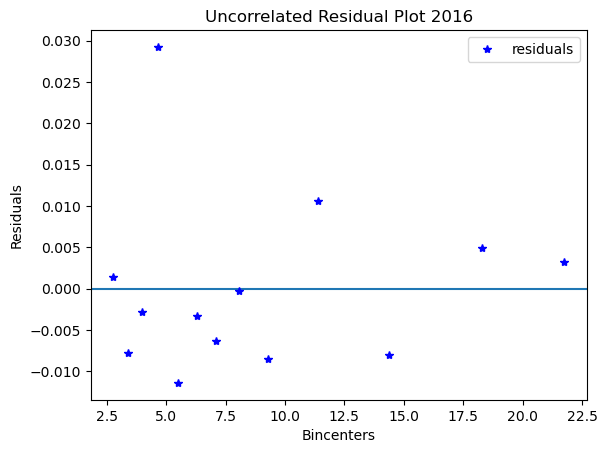

In [34]:
plt.close("all")
ntpl_result.plot_residuals(datafmt='b*')
plt.xlabel("Bincenters")
plt.ylabel("Residuals")
plt.title("Uncorrelated Residual Plot 2016")
plt.show()

## 2017

In [45]:
A = np.min(array17)
B = np.max(array17)
def HighNormalized_PowerLaw (x, Off, n):
        return ((1-n)/(((B-Off)**(1-n))-(A-Off)**(n-1)))*(1/((x-Off)**n))
HnPl_mod = Model(HighNormalized_PowerLaw) 

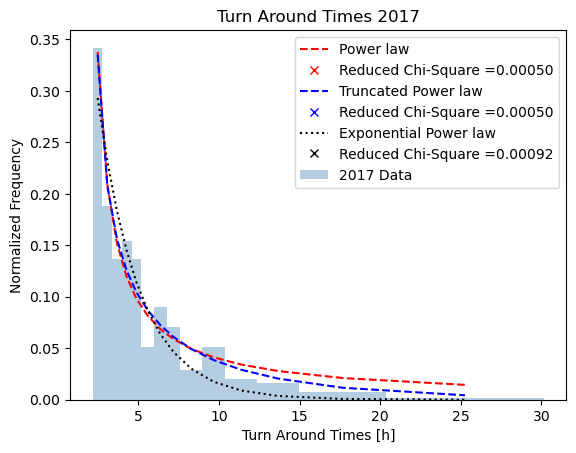

In [54]:
plt.close("all")
fig3, ax3 = plt.subplots()
n3, bins3, patches3 = ax3.hist(data_17, bins=bi17, facecolor='steelblue', alpha=0.4, density=True, label="2017 Data")

binscenters = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-1)])
x = binscenters
y = n3

hnpl_result = HnPl_mod.fit(y, x=x, Off=1.8, n=0.5) 
ax3.plot(binscenters, hnpl_result.best_fit, 'r--', label="Power law")
ax3.plot([], [], 'rx ', label='Reduced Chi-Square ={:.5f}'.format(hnpl_result.redchi))

NTpl_mod.set_param_hint('off', value=1.7, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.7, amp=0.1, lam=0.2, n=1) 
ax3.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax3.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))

nel_result = NEl_mod.fit(y, x=x, off=2, lam=0) 
plt.plot(binscenters, nel_result.best_fit, 'k:', label="Exponential Power law")
ax3.plot([], [], 'kx ', label='Reduced Chi-Square ={:.5f}'.format(nel_result.redchi))
plt.title('Turn Around Times 2017')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig3.savefig("Turn Around Times 2017.pdf")

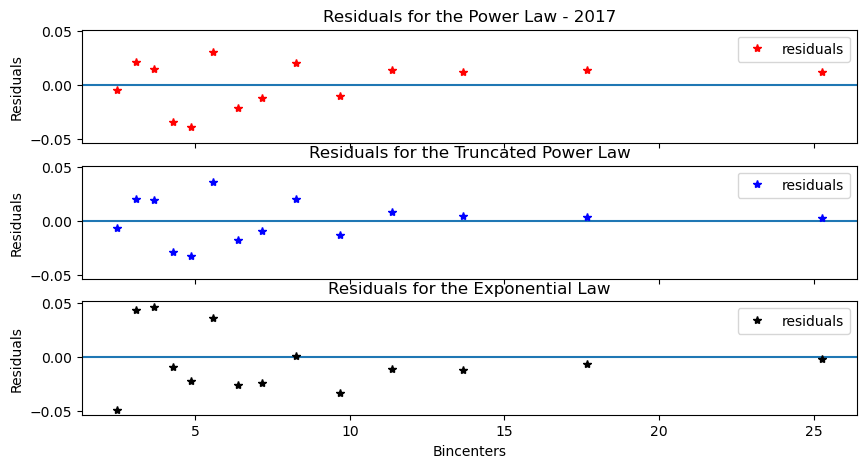

In [55]:
plt.close("all")
fig4, (ax4A, ax4B, ax4C) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10, 5))
hnpl_result.plot_residuals(ax4A, datafmt='r*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax4A.set_ylabel("Residuals")
ax4A.set_title("Residuals for the Power Law - 2017")
ntpl_result.plot_residuals(ax4B, datafmt='b*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax4B.set_ylabel("Residuals")
ax4B.set_title("Residuals for the Truncated Power Law")
nel_result.plot_residuals(ax4C, datafmt='k*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
plt.xlabel("Bincenters")
ax4C.set_ylabel("Residuals")
ax4C.set_title("Residuals for the Exponential Law")
plt.show()
fig4.savefig("Residuals - 2017.pdf")

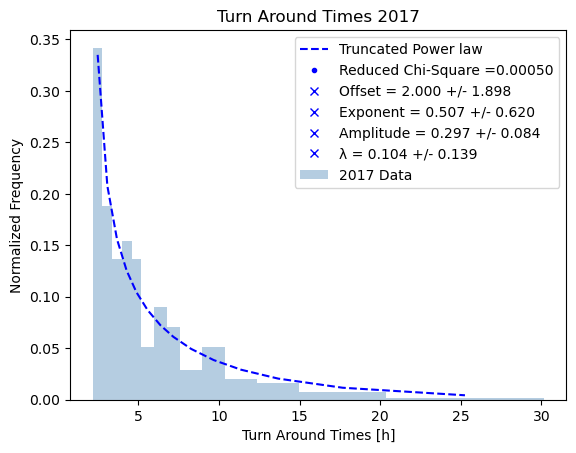

In [56]:
plt.close("all")
fig5, ax5 = plt.subplots()
n3, bins3, patches3 = ax5.hist(data_17, bins=bi17, facecolor='steelblue', alpha=0.4, density=True, label="2017 Data")

binscenters = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-1)])
x = binscenters
y = n3

NTpl_mod.set_param_hint('off', value=1.7, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.7, amp=0.1, lam=0.2, n=1) 
ax5.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax5.plot([], [], 'b. ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax5.plot([], [], 'bx', label='Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['off'].value, ntpl_result.params['off'].stderr ))
ax5.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['n'].value, ntpl_result.params['n'].stderr ))
ax5.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax5.plot([], [], 'bx', label='\u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['lam'].value, ntpl_result.params['lam'].stderr ))

ax5.set_title('Turn Around Times 2017')
ax5.set_xlabel('Turn Around Times [h]')
ax5.set_ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig5.savefig("Turn Around Times 2017 Fit.pdf")

In [57]:
print('__________________2017_________________________________')
print('RESULTs OF THE POWER LAW FIT')
print('-------------------------------------------------------')
print(hnpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE TRUNCATED POWER LAW FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE EXPONENTIAL FIT')
print('-------------------------------------------------------')
print(nel_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')

__________________2017_________________________________
RESULTs OF THE POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(HighNormalized_PowerLaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 14
    # variables        = 2
    chi-square         = 0.00604732
    reduced chi-square = 5.0394e-04
    Akaike info crit   = -104.460760
    Bayesian info crit = -103.182646
[[Variables]]
    Off:  1.52348728 +/- 0.19174368 (12.59%) (init = 1.8)
    n:    0.97951173 +/- 0.16877442 (17.23%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(Off, n) = -0.976
_______________________________________________________
_______________________________________________________
_______________________________________________________
RESULTs OF THE TRUNCATED POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(Normalized_TruncatedPowerLaw)
[[Fit Statis

## 2018

In [58]:
A = np.min(array18)
B = np.max(array18)
def HighNormalized_PowerLaw (x, Off, n):
        return ((1-n)/(((B-Off)**(1-n))-(A-Off)**(n-1)))*(1/((x-Off)**n))
HnPl_mod = Model(HighNormalized_PowerLaw) 

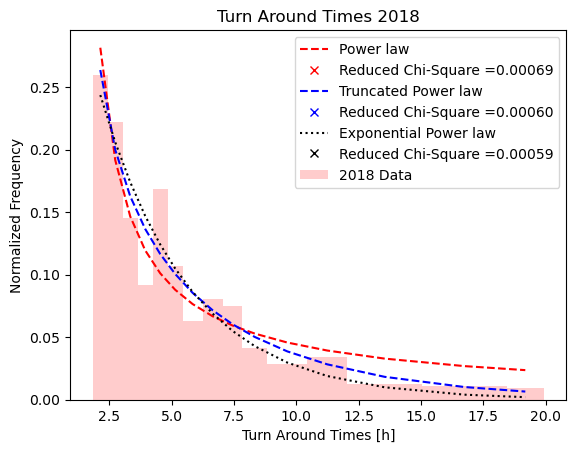

In [60]:
plt.close("all")
fig6, ax6 = plt.subplots()
n3, bins3, patches3 = ax6.hist(data_18, bins=bi18, facecolor='r', alpha=0.2, density=True, label="2018 Data")

binscenters = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-1)])
x = binscenters
y = n3

hnpl_result = HnPl_mod.fit(y, x=x, Off=1, n=0.2) 
ax6.plot(binscenters, hnpl_result.best_fit, 'r--', label="Power law")
ax6.plot([], [], 'rx ', label='Reduced Chi-Square ={:.5f}'.format(hnpl_result.redchi))

#NTpl_mod.set_param_hint('off', value=1.0, min=0, max=2.0)
#ntpl_result = NTpl_mod.fit(y, x=x, off=1, amp=1, lam=0.2, n=0.9) 

NTpl_mod.set_param_hint('off', value=1.9, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.9, amp=0.5, lam=0.2, n=0.5) 
ax6.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax6.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))

nel_result = NEl_mod.fit(y, x=x, off=2, lam=0) 
ax6.plot(binscenters, nel_result.best_fit, 'k:', label="Exponential Power law")
ax6.plot([], [], 'kx ', label='Reduced Chi-Square ={:.5f}'.format(nel_result.redchi))
plt.title('Turn Around Times 2018')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig6.savefig("Turn Around Times 2018.pdf")

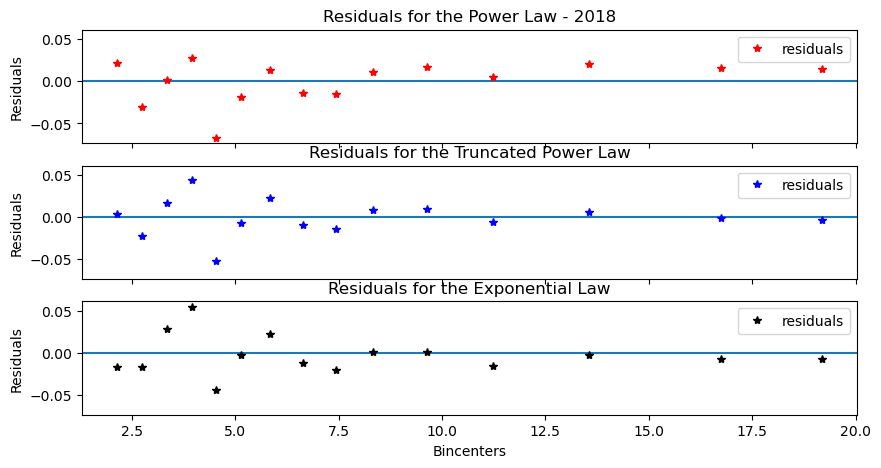

In [61]:
plt.close("all")
fig7, (ax7A, ax7B, ax7C) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10, 5))
hnpl_result.plot_residuals(ax7A, datafmt='r*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax7A.set_ylabel("Residuals")
ax7A.set_title("Residuals for the Power Law - 2018")
ntpl_result.plot_residuals(ax7B, datafmt='b*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax7B.set_ylabel("Residuals")
ax7B.set_title("Residuals for the Truncated Power Law")
nel_result.plot_residuals(ax7C, datafmt='k*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
plt.xlabel("Bincenters")
ax7C.set_ylabel("Residuals")
ax7C.set_title("Residuals for the Exponential Law")
plt.show()
fig7.savefig("Residuals - 2018.pdf")

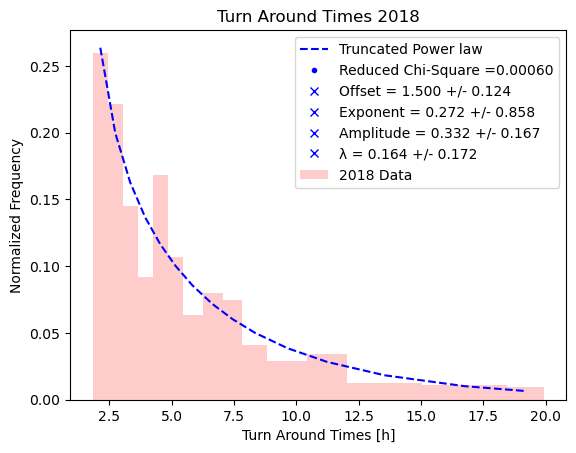

In [62]:
plt.close("all")
fig8, ax8 = plt.subplots()
n3, bins3, patches3 = ax8.hist(data_18, bins=bi18, facecolor='r', alpha=0.2, density=True, label="2018 Data")

binscenters = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-1)])
x = binscenters
y = n3

NTpl_mod.set_param_hint('off', value=1.9, min=1.5, max=2.0)
NTpl_mod.set_param_hint('lam', value=0.2, min=0.1, max=0.4)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.9, amp=0.5, lam=0.2, n=0.5) 
ax8.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax8.plot([], [], 'b. ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax8.plot([], [], 'bx', label='Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['off'].value, ntpl_result.params['off'].stderr ))
ax8.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['n'].value, ntpl_result.params['n'].stderr ))
ax8.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax8.plot([], [], 'bx', label='\u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['lam'].value, ntpl_result.params['lam'].stderr ))




plt.title('Turn Around Times 2018')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig8.savefig("Turn Around Times 2018 Fit.pdf")


In [63]:
print('__________________2018_________________________________')
print('RESULTs OF THE POWER LAW FIT')
print('-------------------------------------------------------')
print(hnpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE TRUNCATED POWER LAW FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE EXPONENTIAL FIT')
print('-------------------------------------------------------')
print(nel_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')

__________________2018_________________________________
RESULTs OF THE POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(HighNormalized_PowerLaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 15
    # variables        = 2
    chi-square         = 0.00894083
    reduced chi-square = 6.8776e-04
    Akaike info crit   = -107.377658
    Bayesian info crit = -105.961558
[[Variables]]
    Off:  1.04743984 +/- 0.19248373 (18.38%) (init = 1)
    n:    0.88239271 +/- 0.16106219 (18.25%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Off, n) = -0.949
_______________________________________________________
_______________________________________________________
_______________________________________________________
RESULTs OF THE TRUNCATED POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(Normalized_TruncatedPowerLaw)
[[Fit Statisti

## TOTAL

In [8]:
A = np.min(array_tot)
B = np.max(array_tot)
def HighNormalized_PowerLaw (x, Off, n):
        return ((1-n)/(((B-Off)**(1-n))-(A-Off)**(n-1)))*(1/((x-Off)**n))
HnPl_mod = Model(HighNormalized_PowerLaw) 

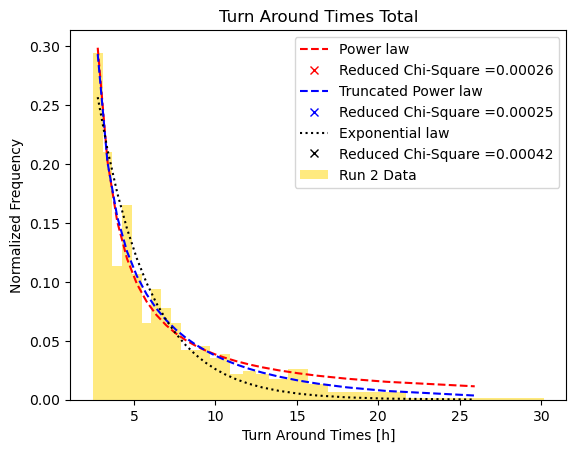

In [9]:
plt.close("all")
fig9, ax9 = plt.subplots()
n4, bins4, patches4 = ax9.hist(dataTot, bins=biT, facecolor='gold', alpha=0.5, density=True, label="Run 2 Data")

binscenters = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-1)])
x = binscenters
y = n4


hnpl_result = HnPl_mod.fit(y, x=x, Off=1.8, n=0.5) 
ax9.plot(binscenters, hnpl_result.best_fit, 'r--', label="Power law")
ax9.plot([], [], 'rx ', label='Reduced Chi-Square ={:.5f}'.format(hnpl_result.redchi))

NTpl_mod.set_param_hint('off', value=1.9, min=1.5, max=2.0)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.9, amp=1, lam=0, n=0.9) 
ax9.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax9.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))

nel_result = NEl_mod.fit(y, x=x, off=2, lam=0) 
ax9.plot(binscenters, nel_result.best_fit, 'k:', label="Exponential law")
ax9.plot([], [], 'kx ', label='Reduced Chi-Square ={:.5f}'.format(nel_result.redchi))

plt.title('Turn Around Times Total')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig9.savefig("Turn Around Times Run 2.pdf")

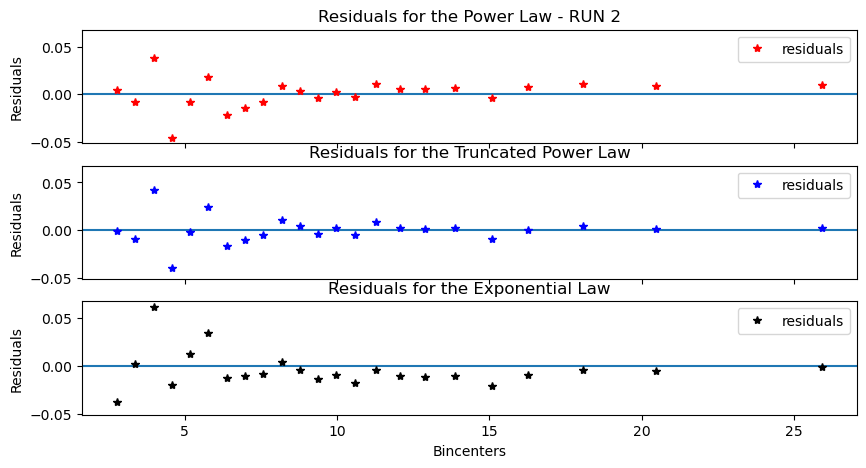

In [10]:
plt.close("all")
fig10, (ax10A, ax10B, ax10C) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10, 5))
hnpl_result.plot_residuals(ax10A, datafmt='r*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax10A.set_ylabel("Residuals")
ax10A.set_title("Residuals for the Power Law - RUN 2")
ntpl_result.plot_residuals(ax10B, datafmt='b*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
ax10B.set_ylabel("Residuals")
ax10B.set_title("Residuals for the Truncated Power Law")
nel_result.plot_residuals(ax10C, datafmt='k*', yerr=None, data_kws=None, fit_kws=None, ax_kws=None, parse_complex='abs')
plt.xlabel("Bincenters")
ax10C.set_ylabel("Residuals")
ax10C.set_title("Residuals for the Exponential Law")
plt.show()
fig10.savefig("Residuals - Run 2.pdf")

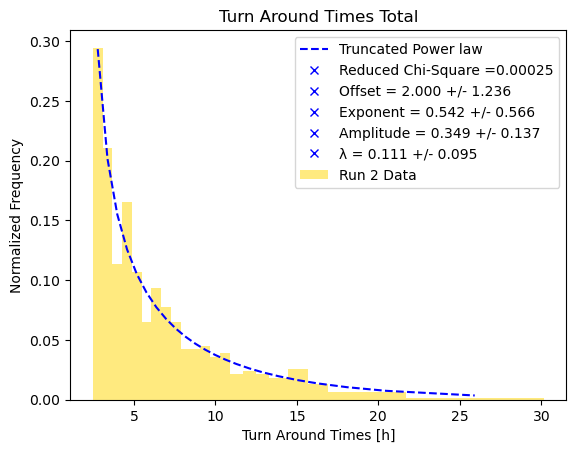

In [11]:
plt.close("all")
fig11, ax11 = plt.subplots()
n4, bins4, patches4 = ax11.hist(dataTot, bins=biT, facecolor='gold', alpha=0.5, density=True, label="Run 2 Data")

binscenters = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-1)])
x = binscenters
y = n4


NTpl_mod.set_param_hint('off', value=1.9, min=1.5, max=2.0)
ntpl_result = NTpl_mod.fit(y, x=x, off=1.9, amp=1, lam=0, n=0.9) 
ax11.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax11.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax11.plot([], [], 'bx', label='Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['off'].value, ntpl_result.params['off'].stderr ))
ax11.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['n'].value, ntpl_result.params['n'].stderr ))
ax11.plot([], [], 'bx', label='Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax11.plot([], [], 'bx', label='\u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['lam'].value, ntpl_result.params['lam'].stderr ))

plt.title('Turn Around Times Total')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()
fig11.savefig("Turn Around Times Run 2 Fit.pdf")

In [12]:
print('__________________RUN 2_________________________________')
print('RESULTs OF THE POWER LAW FIT')
print('-------------------------------------------------------')
print(hnpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE TRUNCATED POWER LAW FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')
print('_______________________________________________________')
print('RESULTs OF THE EXPONENTIAL FIT')
print('-------------------------------------------------------')
print(nel_result.fit_report())
print('_______________________________________________________')
print('_______________________________________________________')

__________________RUN 2_________________________________
RESULTs OF THE POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(HighNormalized_PowerLaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 23
    # variables        = 2
    chi-square         = 0.00547994
    reduced chi-square = 2.6095e-04
    Akaike info crit   = -187.869559
    Bayesian info crit = -185.598571
[[Variables]]
    Off:  1.25474645 +/- 0.07496734 (5.97%) (init = 1.8)
    n:    1.17440673 +/- 0.09151295 (7.79%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(Off, n) = -0.936
_______________________________________________________
_______________________________________________________
_______________________________________________________
RESULTs OF THE TRUNCATED POWER LAW FIT
-------------------------------------------------------
[[Model]]
    Model(Normalized_TruncatedPowerLaw)
[[Fit Statist

### Removing Correlation

In [15]:
def TPL_corr(x, uoff, ulam, un, amp):
     return (amp/(x-(0.938*amp+uoff))**((amp-un)/0.858))*(np.exp(-(-(amp-ulam)/0.683)*(x)))

Corr_mod = Model(TPL_corr)

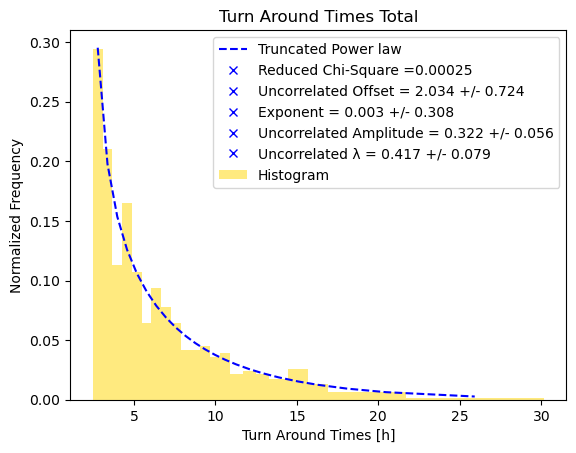

In [16]:
plt.close("all")
fig11, ax11 = plt.subplots()
n4, bins4, patches4 = ax11.hist(dataTot, bins=biT, facecolor='gold', alpha=0.5, density=True, label="Histogram")

binscenters = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-1)])
x = binscenters
y = n4

#Corr_mod.set_param_hint('n', value=0.5, min=0, max=2.0)
#Corr_mod.set_param_hint('uamp', value=0.0, min=0, max=2.0)
Corr_mod.set_param_hint('ulam', value=0.2, min=0, max=3.0)
Corr_mod.set_param_hint('uoff', value=1.9, min=0.0, max=3.0)
ntpl_result = Corr_mod.fit(y, x=x, uoff=1.0,  ulam=0.2, un=0.5, amp=0) 
ax11.plot(binscenters, ntpl_result.best_fit, 'b--', label="Truncated Power law")
ax11.plot([], [], 'bx ', label='Reduced Chi-Square ={:.5f}'.format(ntpl_result.redchi))
ax11.plot([], [], 'bx', label='Uncorrelated Offset = {:.3f} +/- {:.3f}'.format(ntpl_result.params['uoff'].value, ntpl_result.params['uoff'].stderr ))
ax11.plot([], [], 'bx', label='Exponent = {:.3f} +/- {:.3f}'.format(ntpl_result.params['un'].value, ntpl_result.params['un'].stderr ))
ax11.plot([], [], 'bx', label='Uncorrelated Amplitude = {:.3f} +/- {:.3f}'.format(ntpl_result.params['amp'].value, ntpl_result.params['amp'].stderr ))
ax11.plot([], [], 'bx', label='Uncorrelated \u03BB = {:.3f} +/- {:.3f}'.format(ntpl_result.params['ulam'].value, ntpl_result.params['ulam'].stderr ))

plt.title('Uncorrelated Turn Around Times Total')
plt.xlabel('Turn Around Times [h]')
plt.ylabel('Normalized Frequency')


plt.legend(loc='best')
plt.show()

In [8]:
print('_______________________________________________________')
print('RESULTs OF THE Exponential Law FIT')
print('-------------------------------------------------------')
print(ntpl_result.fit_report())

_______________________________________________________
RESULTs OF THE Exponential Law FIT
-------------------------------------------------------
[[Model]]
    Model(TPL_corr)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 23
    # variables        = 4
    chi-square         = 0.00471639
    reduced chi-square = 2.4823e-04
    Akaike info crit   = -187.320726
    Bayesian info crit = -182.778749
[[Variables]]
    uoff:  2.03442082 +/- 0.72365263 (35.57%) (init = 1)
    ulam:  0.41671557 +/- 0.07869478 (18.88%) (init = 0.2)
    un:    0.00274874 +/- 0.30813384 (11209.99%) (init = 0.5)
    amp:   0.32162096 +/- 0.05617089 (17.46%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(uoff, un)   =  0.901
    C(ulam, amp)  =  0.722
    C(ulam, un)   =  0.600
    C(uoff, amp)  = -0.522
    C(uoff, ulam) =  0.209
    C(un, amp)    = -0.114


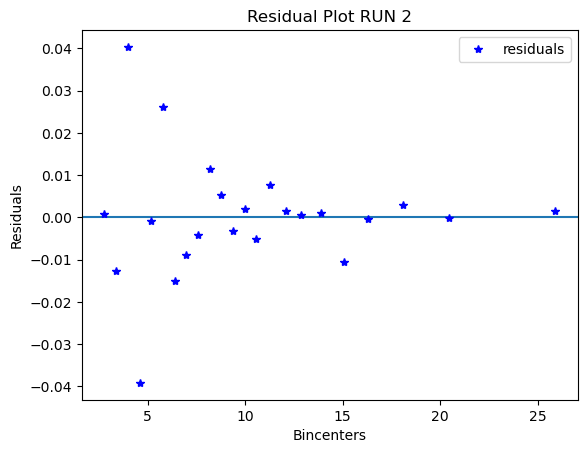

In [13]:
plt.close("all")
ntpl_result.plot_residuals(datafmt='b*')
plt.xlabel("Bincenters")
plt.ylabel("Residuals")
plt.title("Uncorrelated Residual Plot RUN 2")
plt.show()